<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-the-pandas,-numpy,-matplotlib,-statsmodels,-and-scipy-libraries,-and-the-Covid-case-data-file" data-toc-modified-id="Load-the-pandas,-numpy,-matplotlib,-statsmodels,-and-scipy-libraries,-and-the-Covid-case-data-file-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load the pandas, numpy, matplotlib, statsmodels, and scipy libraries, and the Covid case data file</a></span></li><li><span><a href="#Get-descriptive-statistics-for-the-Covid-case-data" data-toc-modified-id="Get-descriptive-statistics-for-the-Covid-case-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Get descriptive statistics for the Covid case data</a></span></li><li><span><a href="#Show-more-detailed-percentile-data" data-toc-modified-id="Show-more-detailed-percentile-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Show more detailed percentile data</a></span></li><li><span><a href="#Test-the-Covid-data-for-normality" data-toc-modified-id="Test-the-Covid-data-for-normality-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Test the Covid data for normality</a></span></li><li><span><a href="#Show-normal-quantile-quantile-plots-(qqplots)-of-total-cases-and-total-cases-per-million" data-toc-modified-id="Show-normal-quantile-quantile-plots-(qqplots)-of-total-cases-and-total-cases-per-million-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Show normal quantile-quantile plots (qqplots) of total cases and total cases per million</a></span></li><li><span><a href="#Show-the-outlier-range-for-total-cases" data-toc-modified-id="Show-the-outlier-range-for-total-cases-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Show the outlier range for total cases</a></span></li><li><span><a href="#Generate-a-data-frame-of-outliers-and-write-it-to-Excel" data-toc-modified-id="Generate-a-data-frame-of-outliers-and-write-it-to-Excel-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Generate a data frame of outliers and write it to Excel</a></span></li><li><span><a href="#Look-a-little-more-closely-at-outliers-for-cases-per-million" data-toc-modified-id="Look-a-little-more-closely-at-outliers-for-cases-per-million-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Look a little more closely at outliers for cases per million</a></span></li><li><span><a href="#Show-a-histogram-of-total-cases" data-toc-modified-id="Show-a-histogram-of-total-cases-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Show a histogram of total cases</a></span></li><li><span><a href="#Perform-a-log-transformation-of-the-Covid-data.-Show-a-histogram-of-the-log-transformation-of-total-cases" data-toc-modified-id="Perform-a-log-transformation-of-the-Covid-data.-Show-a-histogram-of-the-log-transformation-of-total-cases-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Perform a log transformation of the Covid data. Show a histogram of the log transformation of total cases</a></span></li></ul></div>

# Load the pandas, numpy, matplotlib, statsmodels, and scipy libraries, and the Covid case data file

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
import statsmodels.api as sm
import scipy.stats as scistat

In [25]:
# pd.set_option('display.width', 85)
# pd.set_option('display.max_columns', 6)
# pd.set_option('display.max_rows', 20)
pd.options.display.float_format = '{:,.2f}'.format

In [12]:
import watermark
%load_ext watermark

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark


In [13]:
%watermark -n -v -iv

Python implementation: CPython
Python version       : 3.7.9
IPython version      : 7.20.0

pandas     : 1.2.1
matplotlib : 3.3.2
json       : 2.0.9
statsmodels: 0.12.1
watermark  : 2.1.0
scipy      : 1.6.0
numpy      : 1.19.2



In [14]:
covidtotals = pd.read_csv('data/covidtotals.csv')

In [15]:
covidtotals.set_index('iso_code', inplace=True)

In [16]:
totvars = ['location', 'total_cases', 'total_deaths', 'total_cases_pm', 'total_deaths_pm']

In [17]:
demovars = ['population','pop_density','median_age','gdp_per_capita', 'hosp_beds']

# Get descriptive statistics for the Covid case data

In [23]:
covidtotalsonly.info()

<class 'pandas.core.frame.DataFrame'>
Index: 210 entries, AFG to ZWE
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   location         210 non-null    object 
 1   total_cases      210 non-null    int64  
 2   total_deaths     210 non-null    int64  
 3   total_cases_pm   210 non-null    float64
 4   total_deaths_pm  210 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 9.8+ KB


In [18]:
covidtotalsonly = covidtotals.loc[:, totvars]

In [26]:
covidtotalsonly.describe()

,total_cases,total_deaths,total_cases_pm,total_deaths_pm
count,210.00,210.00,210.00,210.00
mean,"29,216.14","1,770.71","1,355.36",55.66
std,"136,397.80","8,705.57","2,625.28",144.79
min,0.00,0.00,0.00,0.00
25%,175.75,4.00,92.54,0.88
50%,"1,242.50",25.50,280.93,6.15
75%,"10,117.00",241.25,"1,801.39",31.78
max,"1,790,191.00","104,383.00","19,771.35","1,237.55"


# Show more detailed percentile data

In [27]:
covidtotalsonly.quantile(np.arange(0.0, 1.1, 0.1))

,total_cases,total_deaths,total_cases_pm,total_deaths_pm
0.00,0.00,0.00,0.00,0.00
0.10,22.90,0.00,18.00,0.00
0.20,105.20,2.00,56.29,0.38
0.30,302.00,6.70,115.43,1.72
0.40,762.00,12.00,213.97,3.96
0.50,"1,242.50",25.50,280.93,6.15
0.60,"2,514.60",54.60,543.96,12.25
0.70,"6,959.80",137.20,"1,071.24",25.95
0.80,"16,847.20",323.20,"2,206.30",49.97
0.90,"46,513.10","1,616.90","3,765.14",138.90


In [28]:
covidtotalsonly.skew()

total_cases       10.80
total_deaths       8.93
total_cases_pm     4.40
total_deaths_pm    4.67
dtype: float64

In [29]:
covidtotalsonly.kurtosis()

total_cases       134.98
total_deaths       95.74
total_cases_pm     25.24
total_deaths_pm    27.24
dtype: float64

# Test the Covid data for normality

In [32]:
def testnorm(var, df):
    stat, p = scistat.shapiro(df[var])
    return p

In [33]:
testnorm('total_cases', covidtotalsonly)

3.753789128593843e-29

In [34]:
testnorm('total_deaths', covidtotalsonly)

4.3427896631016077e-29

In [35]:
testnorm('total_cases_pm', covidtotalsonly)

1.3972683006509067e-23

In [36]:
testnorm('total_deaths_pm', covidtotalsonly)

1.361060423265974e-25

# Show normal quantile-quantile plots (qqplots) of total cases and total cases per million

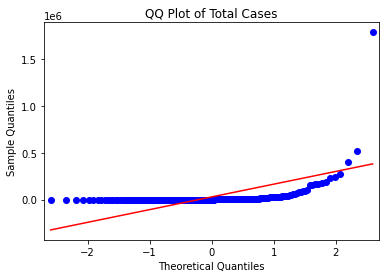

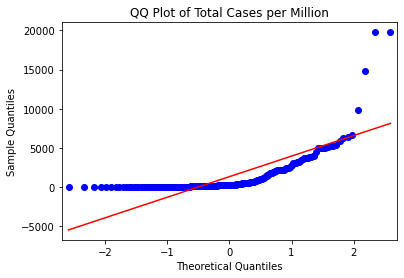

In [38]:
sm.qqplot(covidtotalsonly[['total_cases']].sort_values(['total_cases']), line='s')
plt.title('QQ Plot of Total Cases')
sm.qqplot(covidtotalsonly[['total_cases_pm']].sort_values(['total_cases_pm']), line='s')
plt.title('QQ Plot of Total Cases per Million')
plt.show()

# Show the outlier range for total cases

In [39]:
thirdq, firstq = covidtotalsonly['total_cases'].quantile(0.75), covidtotals['total_cases'].quantile(0.25)

In [40]:
interquartilerange = 1.5*(thirdq-firstq)
interquartilerange

14911.875

In [42]:
outlierhigh, outlierlow = interquartilerange + thirdq, firstq - interquartilerange
outlierhigh, outlierlow

(25028.875, -14736.125)

In [44]:
print(outlierlow, outlierhigh, sep=' <--> ')

-14736.125 <--> 25028.875


# Generate a data frame of outliers and write it to Excel

In [63]:
def getoutliers():
    dfout = pd.DataFrame(columns=covidtotals.columns, data=None)
    for col in covidtotalsonly.columns[1:]:
        thirdq, firstq = covidtotalsonly[col].quantile(0.75), covidtotalsonly[col].quantile(0.25)
        interquartilerange = 1.5 * (thirdq - firstq)
        outlierhigh, outlierlow = interquartilerange + thirdq, firstq - interquartilerange
        df = covidtotals.loc[(covidtotals[col] > outlierhigh) |
                             (covidtotals[col] < outlierlow)]
        df = df.assign(varname=col,
                       threshlow=outlierlow,
                       threshhigh=outlierhigh)
        dfout = pd.concat([dfout, df])
    return dfout

In [64]:
outliers = getoutliers()

In [66]:
outliers.head(2)

,lastdate,location,total_cases,total_deaths,total_cases_pm,total_deaths_pm,population,pop_density,median_age,gdp_per_capita,hosp_beds,varname,threshlow,threshhigh
BGD,2020-06-01,Bangladesh,47153,650,286.31,3.95,"164,689,383.00","1,265.04",27.50,"3,523.98",0.80,total_cases,"-14,736.12","25,028.88"
BLR,2020-06-01,Belarus,42556,235,"4,503.60",24.87,"9,449,321.00",46.86,40.30,"17,167.97",11.00,total_cases,"-14,736.12","25,028.88"


In [65]:
outliers.varname.value_counts()

total_deaths       36
total_cases        33
total_deaths_pm    28
total_cases_pm     17
Name: varname, dtype: int64

In [68]:
outliers.to_excel('views/outlierscases.xlsx')

# Look a little more closely at outliers for cases per million

In [70]:
outliers.loc[outliers['varname'] == 'total_cases_pm',
             ['location', 'total_cases_pm', 'pop_density', 'gdp_per_capita'
              ]].sort_values(['total_cases_pm'], ascending=False)

,location,total_cases_pm,pop_density,gdp_per_capita
SMR,San Marino,"19,771.35",556.67,"56,861.47"
QAT,Qatar,"19,753.15",227.32,"116,935.60"
VAT,Vatican,"14,833.13",NaN,NaN
AND,Andorra,"9,888.05",163.75,NaN
BHR,Bahrain,"6,698.47","1,935.91","43,290.71"
LUX,Luxembourg,"6,418.78",231.45,"94,277.96"
KWT,Kuwait,"6,332.42",232.13,"65,530.54"
SGP,Singapore,"5,962.73","7,915.73","85,535.38"
USA,United States,"5,408.39",35.61,"54,225.45"
ISL,Iceland,"5,292.31",3.40,"46,482.96"


In [71]:
covidtotals[['pop_density', 'gdp_per_capita']].quantile([0.25, 0.5, 0.75])

,pop_density,gdp_per_capita
0.25,37.42,"4,485.33"
0.50,87.25,"13,183.08"
0.75,214.12,"28,556.53"


# Show a histogram of total cases

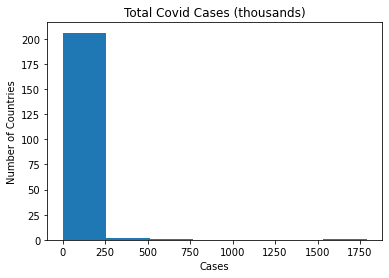

In [72]:
plt.hist(covidtotalsonly['total_cases']/1000, bins=7)
plt.title('Total Covid Cases (thousands)')
plt.xlabel('Cases')
plt.ylabel('Number of Countries')
plt.show()

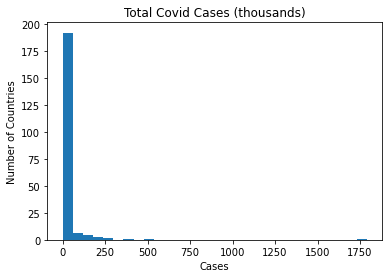

In [73]:
plt.hist(covidtotalsonly['total_cases']/1000, bins=30)
plt.title('Total Covid Cases (thousands)')
plt.xlabel('Cases')
plt.ylabel('Number of Countries')
plt.show()

# Perform a log transformation of the Covid data. Show a histogram of the log transformation of total cases

In [74]:
covidlogs = covidtotalsonly.copy()

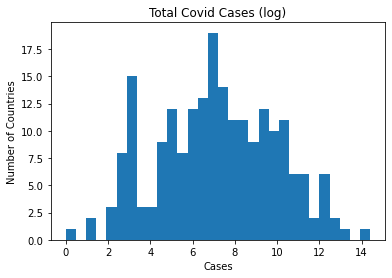

In [75]:
for col in covidtotalsonly.columns[1:]:
    covidlogs[col] = np.log1p(covidlogs[col])
    
plt.hist(covidlogs['total_cases'], bins=30)
plt.title('Total Covid Cases (log)')
plt.xlabel('Cases')
plt.ylabel('Number of Countries')
plt.show()